# Stock Price Analysis:

In this project I look at the stock performance of Johnson & Johnson, Ford, and Microsoft, 
sourcing the data from yfinance.

The analysis includes:  
- Daily and cumulative returns  
- Annualised return  
- Volatility (risk)  
- Sharpe ratio  
- Rolling 30-day volatility  

The aim is to practice Python for finance and see how different companies compare over time.


Step 1: Importing supporting liabraries

In [37]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Step 2: Downloading the data 

In [38]:
# Choose your tickers
tickers = ["JNJ", "F", "MSFT"]

# Download stock data (2015 onwards)
stocks = yf.download(tickers, start="2015-01-01", auto_adjust=False)["Close"]
# Rename columns for readability
stocks.columns = ['Johnson & Johnson', 'Ford', 'Microsoft']

stocks.head()

[*********************100%***********************]  3 of 3 completed


Johnson & Johnson        Ford  Microsoft
Date                                                
2015-01-02              15.36  104.519997  46.759998
2015-01-05              14.76  103.790001  46.330002
2015-01-06              14.62  103.279999  45.650002
2015-01-07              15.04  105.559998  46.230000
2015-01-08              15.42  106.389999  47.590000

Step 3: Defining the analysis function

In [39]:
def analyse_stocks(stocks):
    returns = stocks.pct_change(fill_method=None)
    cumulative = (1 + returns).cumprod()
    volatility = returns.std()
    annual_return = returns.mean() * 252
    sharpe = annual_return / (volatility * (252**0.5))
    rolling_vol = returns.rolling(window=30).std()
    
    return {
        "returns": returns,
        "cumulative": cumulative,
        "volatility": volatility,
        "annual_return": annual_return,
        "sharpe": sharpe,
        "rolling_vol": rolling_vol
    }

Step 4: Running the analysis function

In [40]:
results = analyse_stocks(stocks)

print("Volatility:\n", results["volatility"])
print("\nAnnual Returns:\n", results["annual_return"])
print("\nSharpe Ratios:\n", results["sharpe"])


Volatility:
 Johnson & Johnson    0.022579
Ford                 0.011555
Microsoft            0.017100
dtype: float64

Annual Returns:
 Johnson & Johnson    0.040316
Ford                 0.066312
Microsoft            0.261115
dtype: float64

Sharpe Ratios:
 Johnson & Johnson    0.112477
Ford                 0.361517
Microsoft            0.961937
dtype: float64


Step 5: Plot cumulative returns

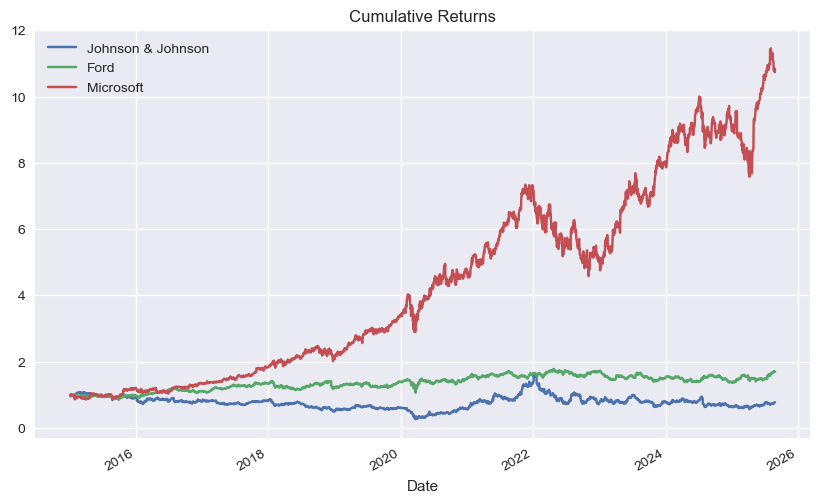

In [41]:
# Cumulative Returns
results["cumulative"].plot(figsize=(10,6), title="Cumulative Returns")
plt.show()

Step 6: Plot 30-day rolling volatility

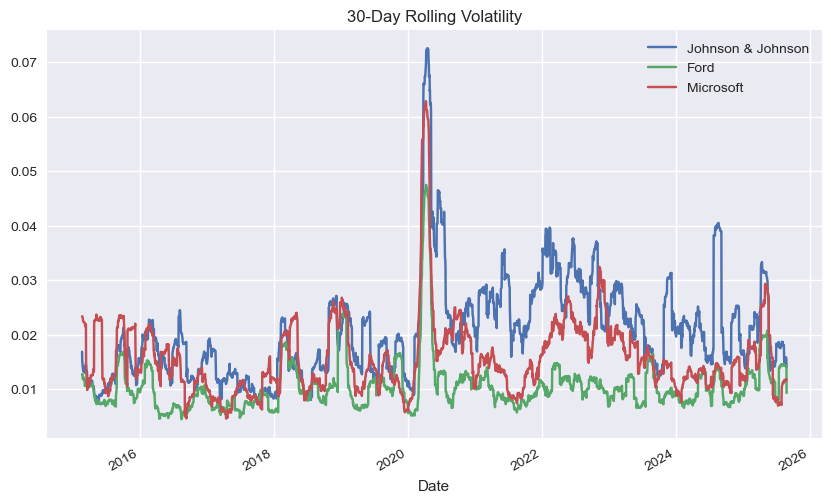

In [42]:
# Rolling Volatility
results["rolling_vol"].plot(figsize=(10,6), title="30-Day Rolling Volatility")
plt.show()

Step 7: Observations

# Volatility 
Johnson & Johnson has the highest volatility at 0.0226, which means it is the riskiest. Meanwhile, Ford has the lowest at 0.0116, making it the most stable. This is consistent with the 30-day rolling volatility graph. The graph shows Johnson & Johnson experiencing the largest fluctations over time and Ford with a smoother trend line. 

# Annual return 
Microsoft produced the highest annual returns at 26.1%, compared to Johnson & Johnson with the lowest at 4.0%. This shows that Microsoft has the strongest growth of the three companies. The cumulative returns graph clearly illustrates Microsoft's steep growth curve, while Johnson & Johnson is shows limited growth. 

# Sharpe Ratio 
Microsoft has a higher Sharpe Ratio at 0.96 compared to Johnson & Johnson at 0.11. This indicates that Microsoft offered the best risk-adjusted returns, while Johnson & Johnson offered weaker returns for its risk level.

# Overall
The results and graphs together highlight relationship between risk (volatility) and reward (returns), with the Sharpe Ratio providing a clearer comparison.
